In [3]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      1428 non-null   int64  
 1   purpose            1428 non-null   object 
 2   int.rate           1428 non-null   float64
 3   installment        1428 non-null   float64
 4   log.annual.inc     1428 non-null   float64
 5   dti                1428 non-null   float64
 6   fico               1428 non-null   int64  
 7   days.with.cr.line  1428 non-null   float64
 8   revol.bal          1428 non-null   int64  
 9   revol.util         1428 non-null   float64
 10  inq.last.6mths     1428 non-null   int64  
 11  delinq.2yrs        1428 non-null   int64  
 12  pub.rec            1428 non-null   int64  
 13  not.fully.paid     1428 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 156.3+ KB


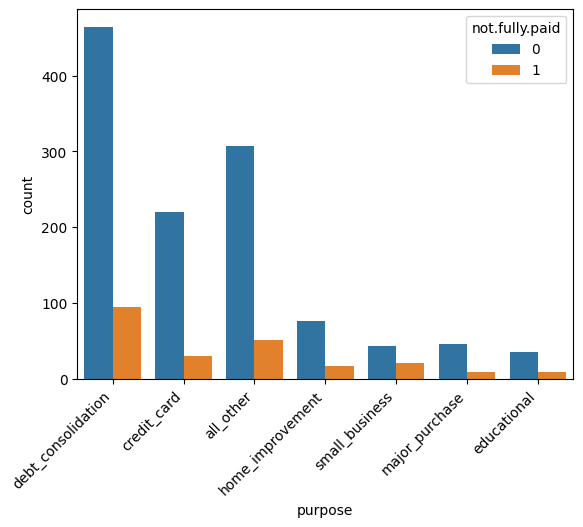

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df,x='purpose',hue='not.fully.paid')
plt.xticks(rotation=45, ha='right');

In [6]:
pre_df = pd.get_dummies(df,columns=['purpose'],drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [7]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [8]:
from sklearn.naive_bayes import *

model = GaussianNB()

model.fit(X_train, y_train);

In [10]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_gauss= model.predict(X_test)

accuray_gauss = accuracy_score(y_pred_gauss, y_test)
precision_gauss = precision_score(y_pred_gauss, y_test, average="weighted")
recall_guass= recall_score(y_pred_gauss, y_test, average="weighted")
print("Accuracy_gauss:", accuray_gauss)
print("Precision Score_gauss:", precision_gauss)
print("recall_guass:", recall_guass)

Accuracy_gauss: 0.7923728813559322
Precision Score_gauss: 0.8641484865303335
recall_guass: 0.7923728813559322


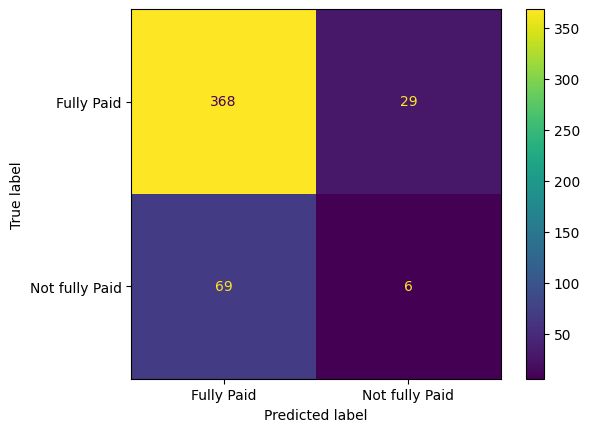

In [26]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred_gauss)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [11]:
from sklearn.naive_bayes import GaussianNB

model = MultinomialNB()

model.fit(X_train, y_train);
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_multi= model.predict(X_test)

accuray_multi = accuracy_score(y_pred_multi, y_test)
precision_multi = precision_score(y_pred_multi, y_test, average="weighted")
recall_multi= recall_score(y_pred_multi, y_test, average="weighted")
print("Accuracy_multi:", accuray_multi)
print("Precision Score_multi:", precision_multi)
print("recall_multi:", recall_multi)

Accuracy_multi: 0.6398305084745762
Precision Score_multi: 0.5965422874951971
recall_multi: 0.6398305084745762


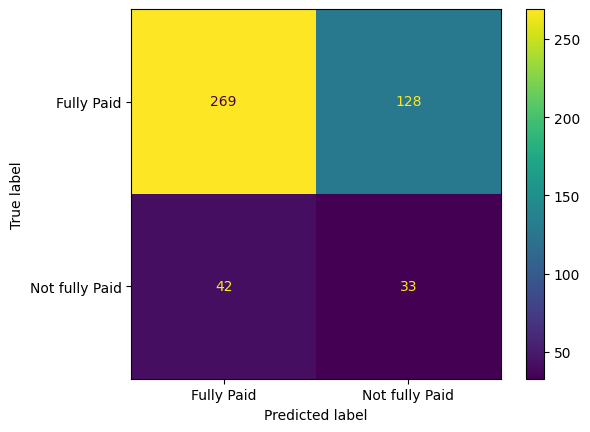

In [28]:
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred_multi)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Accuracy_bernoulli: 0.836864406779661
Precision Score_bernoulli: 0.9907462750288177
recall_bernoulli: 0.836864406779661


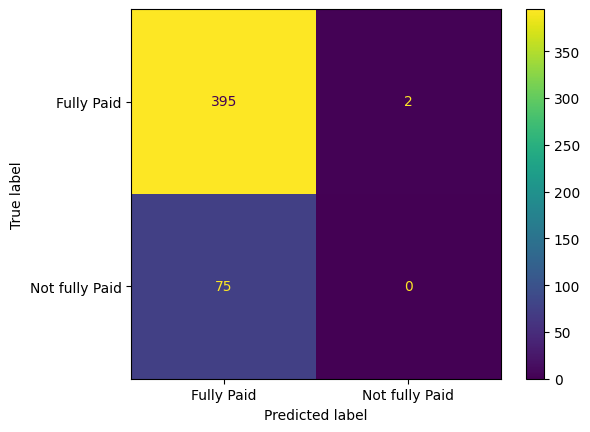

In [12]:
from sklearn.naive_bayes import GaussianNB

model = BernoulliNB()

model.fit(X_train, y_train);
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_bernoulli= model.predict(X_test)

accuray_bernoulli = accuracy_score(y_pred_bernoulli, y_test)
precision_bernoulli = precision_score(y_pred_bernoulli, y_test, average="weighted")
recall_bernoulli= recall_score(y_pred_bernoulli, y_test, average="weighted")
print("Accuracy_bernoulli:", accuray_bernoulli)
print("Precision Score_bernoulli:", precision_bernoulli)
print("recall_bernoulli:", recall_bernoulli)
labels = ["Fully Paid", "Not fully Paid"]
cm = confusion_matrix(y_test, y_pred_bernoulli)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();